In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import wasserstein_distance
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Mean embedding cosine similarity: -0.0189
Average per-dimension Wasserstein distance: 0.2712


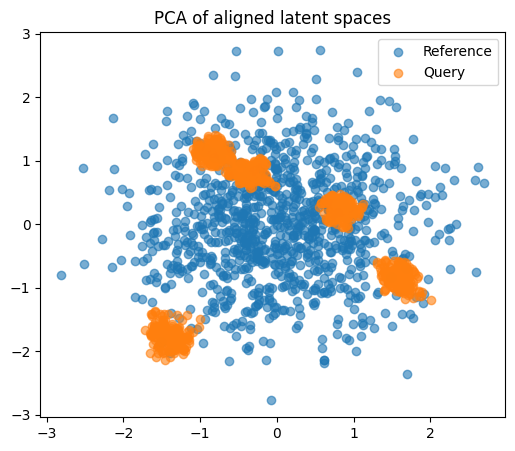

In [2]:

# load embeddings + ref labels (for colored visualization)
data = np.load("mock_sc_align/final_embeddings.npz")
z_ref = data["z_ref"]
z_query = data["z_query"]

ref_labels = np.load("mock_sc/mock_sc_dataset.npz")["ref_labels"]

# --- 1.1 Cosine distance between mean embeddings
mean_ref = z_ref.mean(axis=0)
mean_query = z_query.mean(axis=0)
cos_sim = np.dot(mean_ref, mean_query) / (
    np.linalg.norm(mean_ref) * np.linalg.norm(mean_query)
)
print(f"Mean embedding cosine similarity: {cos_sim:.4f}")

# --- 1.2 Wasserstein distance (1D per latent dimension)
wd = np.mean([
    wasserstein_distance(z_ref[:, i], z_query[:, i])
    for i in range(z_ref.shape[1])
])
print(f"Average per-dimension Wasserstein distance: {wd:.4f}")

# --- 1.3 PCA plot of combined latent spaces (color by reference/query)
z_all = np.vstack([z_ref, z_query])
domain = np.array(["ref"] * len(z_ref) + ["query"] * len(z_query))
pca = PCA(n_components=2)
z_2d = pca.fit_transform(z_all)

plt.figure(figsize=(6,5))
plt.scatter(z_2d[domain=="ref",0], z_2d[domain=="ref",1], c="tab:blue", alpha=0.6, label="Reference")
plt.scatter(z_2d[domain=="query",0], z_2d[domain=="query",1], c="tab:orange", alpha=0.6, label="Query")
plt.title("PCA of aligned latent spaces")
plt.legend()
plt.show()
